In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
dir_path = "gdrive/My Drive/train"

In [4]:
import numpy as np
import pandas as pd
import cv2
import os 
from PIL import Image

In [5]:
import os
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

gdrive/My Drive/train/apple_14.jpg
gdrive/My Drive/train/apple_10.xml
gdrive/My Drive/train/apple_12.xml
gdrive/My Drive/train/apple_11.jpg
gdrive/My Drive/train/apple_13.xml
gdrive/My Drive/train/apple_12.jpg
gdrive/My Drive/train/apple_11.xml
gdrive/My Drive/train/apple_14.xml
gdrive/My Drive/train/apple_1.jpg
gdrive/My Drive/train/apple_1.xml
gdrive/My Drive/train/apple_13.jpg
gdrive/My Drive/train/apple_10.jpg
gdrive/My Drive/train/apple_16.jpg
gdrive/My Drive/train/apple_15.xml
gdrive/My Drive/train/apple_15.jpg
gdrive/My Drive/train/apple_20.jpg
gdrive/My Drive/train/apple_21.jpg
gdrive/My Drive/train/apple_31.jpg
gdrive/My Drive/train/apple_18.xml
gdrive/My Drive/train/apple_33.jpg
gdrive/My Drive/train/apple_37.jpg
gdrive/My Drive/train/apple_26.jpg
gdrive/My Drive/train/apple_37.xml
gdrive/My Drive/train/apple_27.jpg
gdrive/My Drive/train/apple_19.xml
gdrive/My Drive/train/apple_25.xml
gdrive/My Drive/train/apple_32.jpg
gdrive/My Drive/train/apple_3.jpg
gdrive/My Drive/train/a

In [9]:
images  =  []       
labels  =  [] 
train_path  =  'gdrive/My Drive/train'
for filename in os.listdir('gdrive/My Drive/train'):
    if filename.split('.')[1]  == 'jpg':
        img  =  cv2.imread(os.path.join(train_path,filename))
        arr = Image.fromarray(img,'RGB')
        img_arr = arr.resize((50,50))
        labels.append(filename.split('_')[0])
        images.append(np.array(img_arr))

In [10]:
np.unique(labels)

array(['apple', 'banana', 'mixed', 'orange'], dtype='<U6')

In [11]:
from sklearn.preprocessing import LabelEncoder
lb_encod  =  LabelEncoder()
labels = pd.DataFrame(labels)
labels = lb_encod.fit_transform(labels[0])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

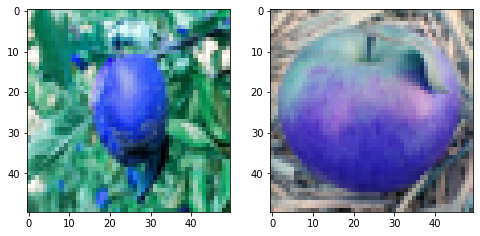

In [12]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (8,8))
ax = figure.add_subplot(121)
ax.imshow(images[0])
bx = figure.add_subplot(122)
bx.imshow(images[60])
plt.show()

In [13]:
images = np.array(images)
np.save("image",images)
np.save("labels",labels)

#Loading the images and labels that we have saved above
image = np.load("image.npy",allow_pickle = True)
labels = np.load("labels.npy",allow_pickle = True)

img_shape  = np.arange(image.shape[0])
np.random.shuffle(img_shape)
image = image[img_shape]
labels = labels[img_shape]

In [14]:
num_classes = len(np.unique(labels))
len_data = len(image)

In [15]:
x_train, x_test = image[(int)(0.1*len_data):],image[:(int)(0.1*len_data)]
y_train,y_test = labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

import keras
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.layers import Activation, Convolution2D, Dropout, Conv2D,AveragePooling2D, BatchNormalization,Flatten,GlobalAveragePooling2D
from keras import layers
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

l2_reg = 0.001
opt = Adam(lr = 0.001)

#Defining the CNN Model
cnn_model  =  Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (2,2), input_shape = (50,50, 3), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.1))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(16, activation = 'relu'))
cnn_model.add(Dense(4, activation = 'softmax'))

#CNN Model Summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 49, 49, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 128)         0

In [17]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])


In [21]:
file1 = 'weights.hdf5'
checkpoint = ModelCheckpoint(file1, monitor='loss', verbose=1, save_best_only=True, mode='min')
history = cnn_model.fit(x_train,y_train,batch_size = 128,epochs = 110,verbose = 1,validation_split = 0.33)


Epoch 1/110
2/2 [==============================] - 0s 167ms/step - loss: 102.8322 - accuracy: 0.3056 - val_loss: 8.7040 - val_accuracy: 0.2639
Epoch 2/110
2/2 [==============================] - 0s 61ms/step - loss: 9.6506 - accuracy: 0.2917 - val_loss: 6.3982 - val_accuracy: 0.1250
Epoch 3/110
2/2 [==============================] - 0s 68ms/step - loss: 6.3486 - accuracy: 0.0694 - val_loss: 2.2661 - val_accuracy: 0.1250
Epoch 4/110
2/2 [==============================] - 0s 63ms/step - loss: 2.4639 - accuracy: 0.1389 - val_loss: 1.5169 - val_accuracy: 0.3056
Epoch 5/110
2/2 [==============================] - 0s 127ms/step - loss: 1.5166 - accuracy: 0.3125 - val_loss: 1.5650 - val_accuracy: 0.2222
Epoch 6/110
2/2 [==============================] - 0s 106ms/step - loss: 1.8006 - accuracy: 0.2708 - val_loss: 1.6294 - val_accuracy: 0.1667
Epoch 7/110
2/2 [==============================] - 0s 112ms/step - loss: 1.7057 - accuracy: 0.2500 - val_loss: 1.5140 - val_accuracy: 0.3056
Epoch 8/110
2/

In [22]:
scores  =  cnn_model.evaluate(x_test, y_test, verbose = 1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1/1 [==============================] - 0s 1ms/step - loss: 1.4653 - accuracy: 0.2500
Test loss: 1.4652810096740723
Test accuracy: 0.25


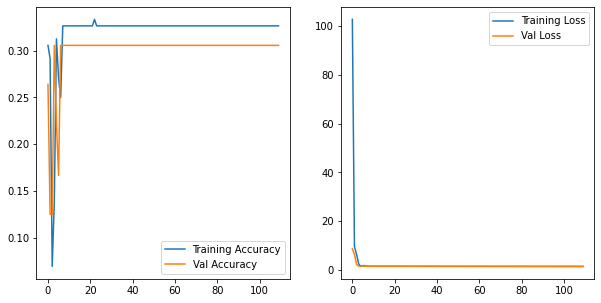

In [23]:
figure = plt.figure(figsize = (10,5))
ax = figure.add_subplot(121)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Training Accuracy','Val Accuracy'])
bx = figure.add_subplot(122)
bx.plot(history.history['loss'])
bx.plot(history.history['val_loss'])
bx.legend(['Training Loss','Val Loss'])

apple


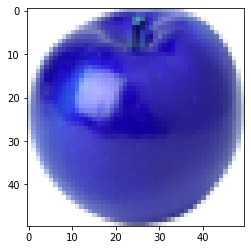

In [27]:
test_path  =  'gdrive/My Drive/test'
t_labels = []
t_images = []
for filename in os.listdir('gdrive/My Drive/test'):
    if filename.split('.')[1]  ==  'jpg':
        img  =  cv2.imread(os.path.join(test_path,filename))
        arr = Image.fromarray(img,'RGB')
        img_arr = arr.resize((50,50))
        t_labels.append(filename.split('_')[0])
        t_images.append(np.array(img_arr))

test_images = np.array(t_images)
np.save("test_image",test_images)
test_image = np.load("image.npy",allow_pickle = True)

pred = np.argmax(cnn_model.predict(test_image),axis = 1)
prediction  =  lb_encod.inverse_transform(pred)

test_image = np.expand_dims(test_image[25],axis = 0)
pred_test = np.argmax(cnn_model.predict(test_image),axis = 1)
prediction_test  =  lb_encod.inverse_transform(pred_test)

print(prediction_test[0])
plt.imshow(test_images[11])